<a href="https://colab.research.google.com/github/comp-neural-circuits/plasticity-workshop/blob/dev/hebbian_plasticity_in_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hebbian plasticity in action!

In this part of the tutorial, we will see how hebbian plasticity acts in numerical simulations and learn to show biological computations using plasticity in simulations. 

In Section 1, we will implement hebbian rules at each time step. 

In Section 2, we will use hebbian plasticity and L-events to form receptive fields.

In [119]:
import sys, json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import norm

# Calculate change of weight 'on the fly'

In the last section, we simulated weight dynamics by first calculating the correlation or covariance matrix of the input. However, in biology and in numerical simulations, we don't have this long time information of how inputs are correlated. Instead, we know the firing rate of neurons at that time. Therefore we use the basic formulation of hebbian plasticity that depends on presynaptic rate $ \rho(t)$ and postsynaptic rate $ v(t)$:

\begin{equation}
    \tau_w \dot{w} = v(t) \; \rho(t)
\end{equation}

In the first section, we will go over how weights are updated at each time step by calculating $ \Delta w$ as a function of presynaptic or postsynaptic rate. This part is easy, we just have to write the command `dw = ` in the exact form as the given equation.  

### Simple Hebbian

The most basic form of Hebbian plasticity is the equation as we saw above.

In [117]:
def hebbian_1synapse(p, v):
    dw = v * p
    return dw

We can give different presynaptic and postsynaptic rates to this equation and $\Delta w$ (`dw` in the code) will always be postive, which means we will always have LTP.

Exercise: Plot $ \Delta w$ for a range of presynaptic rates. 

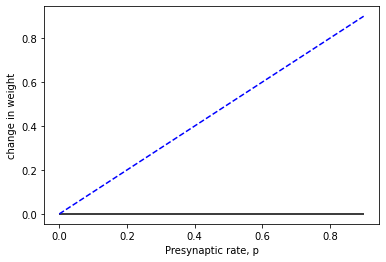

In [132]:
v = 1.
p_range = np.arange(0., 1., 0.1)
dw_all = np.zeros(np.shape(p_range))

for i,p in enumerate(p_range):
    dw = hebbian_1synapse(v, p)
    dw_all[i] = dw

fig = plt.figure()
plt.plot(p_range, dw_all, 'b--')
plt.hlines(0, p_range[0], p_range[-1], 'k', '-')
plt.xlabel('Presynaptic rate, p')
plt.ylabel('change in weight')
plt.show()

Exercise: Plot $ \Delta w$ for a range of presynaptic and postynaptic rates.

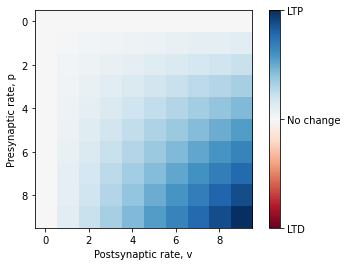

In [148]:
p_range = np.arange(0., 1., 0.1)
v_range = np.arange(0., 1., 0.1)
dw_all = np.zeros((len(p_range), len(v_range)))

for i,p in enumerate(p_range):
    for j,v in enumerate(v_range):
        dw = hebbian_1synapse(p, v)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel('Postsynaptic rate, v')
plt.ylabel('Presynaptic rate, p')
plt.show()

### Hebbian with threshold

We can add a threshold to the Hebbian plasticity equation to introduce LTD at some points. Let's put the threshold in the presynaptic term and the equation is: 
\begin{equation}
    \tau \dot{w} = \; v(t) \; (\rho(t) - \theta)
\end{equation}

In Section 2, we will use this form of hebbian plasticity along with L-events to form receptive fields. 

Exercise: What should the `dw =` term here be? 

In [152]:
def hebbian_threshold_1synapse(p, v, theta):
    dw = v * (p - theta)
    return dw

In this case, $\Delta w$ will change sign based on the presynaptic rate. 

Exercise: Plot $ \Delta w$ for a range of presynaptic rates for $ \theta = 0.5 $ and then for different values of $ \theta $

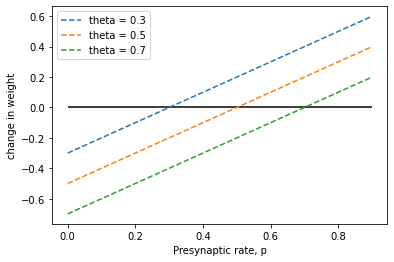

In [153]:
v = 1.
p_range = np.arange(0., 1., 0.1)
dw_all = np.zeros(np.shape(p_range))
theta = 0.5

fig = plt.figure()
plt.hlines(0, p_range[0], p_range[-1], 'k', '-')
plt.xlabel('Presynaptic rate, p')
plt.ylabel('change in weight')

for theta in [0.3, 0.5, 0.7]:
    for i,p in enumerate(p_range):
        dw = hebbian_threshold_1synapse(p, v, theta)
        dw_all[i] = dw

    plt.plot(p_range, dw_all, '--', label='theta = {}'.format(theta))

plt.legend()
plt.show()

Exercise: Plot $ \Delta w$ for a range of presynaptic and postynaptic rates. Try changing $\theta$ to see how the boundary of LTP vs LTD shifts. 

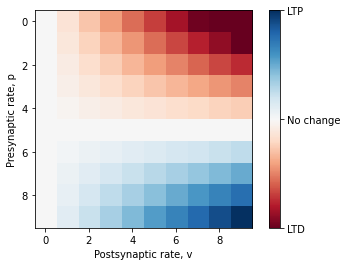

In [157]:
p_range = np.arange(0., 1., 0.1)
v_range = np.arange(0., 1., 0.1)
dw_all = np.zeros((len(p_range), len(v_range)))
theta = 0.5

for i,p in enumerate(p_range):
    for j,v in enumerate(v_range):
        dw = hebbian_threshold_1synapse(p, v, theta)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel('Postsynaptic rate, v')
plt.ylabel('Presynaptic rate, p')
plt.show()

Optional Exercise: How would this distribution of LTP and LTD change if we have threshold in postsynaptic rate, or if we have the threshold in both pre- and post-synaptic rate part? 

Try modifying the function according to these two equations and see the distribution of LTP and LTD. 

\begin{align}
    \tau \dot{w} =& \; (v - \theta) ρ \\
    \tau \dot{w} =& \; (v - \theta) (ρ - \theta)
\end{align}

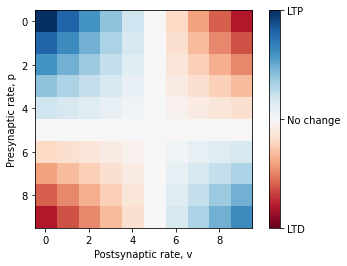

In [149]:
def hebbian_threshold_1synapse(p, v, theta):
    dw = (v - theta) * (p - theta)
    return dw

p_range = np.arange(0., 1., 0.1)
v_range = np.arange(0., 1., 0.1)
dw_all = np.zeros((len(p_range), len(v_range)))
theta = 0.5

for i,p in enumerate(p_range):
    for j,v in enumerate(v_range):
        dw = hebbian_threshold_1synapse(p, v, theta)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel('Postsynaptic rate, v')
plt.ylabel('Presynaptic rate, p')
plt.show()

### BCM rule

We saw another form of Hebbian plasticity with an adaptive threshold, which is the BCM rule. In this rule, the threshold is in the postsynaptic term. The threshold is also updated at each time point according to these equations:

\begin{align}
    \tau_w \dot{w} =& \; v(v-θ ) ρ \\
    \tau_{\theta} {\theta} \dot{\theta}  =& - θ + \frac{\bar{v}^{2}}{\rho_0}
\end{align}

In simulations, as we update weights at each time point, $ \theta$ will have a certain value. Because we assume that $ \theta$ changes much slower than weights, meaning $ \tau_w << \tau_{\theta} $, we will assume for now that $ \theta$ has this value:
    \theta = \frac{\bar{v}^{2}}{\rho_0}
\end{equation}

To observe the effect of different $ \theta$, we will vary $ \bar{v}$ (in relation to $ \rho_0$) instead.  


Exercise: Write the function for bcm weight update. 

In [158]:
def bcm_1synapse(p, v, v_bar, p0):
    theta = v_bar**2 / p0
    dw = v * (v - theta) * p
    return dw

Here, the threshold is in the postsynaptic rate term, so the $\Delta w$ will change with postsynaptic rates $ v$

Exercise: Plot $ \Delta w$ for a range of postsynaptic rates for $ \theta = 0.5 $. Then, plot the same for different values of theta. 

Hint: What should be the value of $\bar{v}$ to get $ \theta = 0.5 $?

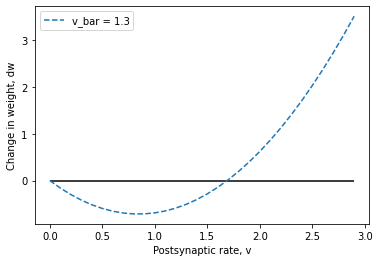

In [169]:
p = 1.
v_range = np.arange(0., 3., 0.1)
dw_all = np.zeros(np.shape(v_range))
p0 = 1. 
v_bar = 1.3

fig = plt.figure()
plt.hlines(0, v_range[0], v_range[-1], 'k', '-')
plt.xlabel('Postsynaptic rate, v')
plt.ylabel('Change in weight, dw')

#for v_bar in [1.1, 1.3, 1.5]:
for i,v in enumerate(v_range):
    dw = bcm_1synapse(p, v, v_bar, p0)
    dw_all[i] = dw

plt.plot(v_range, dw_all, '--', label='v_bar = {}'.format(v_bar))

plt.legend()
plt.show()

Exercise: Plot $ \Delta w$ for a range of presynaptic and postynaptic rates. Try changing $\theta$ to see how the boundary of LTP vs LTD shifts. 

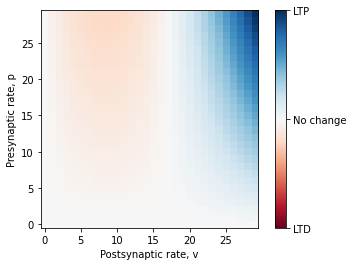

In [168]:
p_range = np.arange(0., 3., 0.1)
v_range = np.arange(0., 3., 0.1)
dw_all = np.zeros((len(p_range), len(v_range)))
p0 = 1.
v_bar = 1.3

for i,p in enumerate(p_range):
    for j,v in enumerate(v_range):
        dw = bcm_1synapse(p, v, v_bar, p0)
        dw_all[i, j] = dw

fig = plt.figure()
ax = plt.gca()
im = ax.imshow(dw_all, origin='lower', cmap='RdBu', vmin=-np.max(dw_all), vmax=np.max(dw_all))
cbar = plt.colorbar(im, ax=ax, ticks=[-np.max(dw_all), 0., np.max(dw_all)])
cbar.ax.set_yticklabels(['LTD', 'No change', 'LTP'])
plt.xlabel('Postsynaptic rate, v')
plt.ylabel('Presynaptic rate, p')
plt.show()

# Using Hebbian plasticity to form Receptive Fields

First, we set up some utility functions and visualization tools.

In [77]:
# utility functions

def setup_simulation():
    t = np.arange(0., params['t_sim'], params['dt'])
    st = np.arange(0., params['t_sim'], params['sdt'])
    rX = np.zeros((params['n0'], len(t)))
    rY = np.zeros((params['n1'], len(t)))
    wXY = np.zeros((params['n0']*params['n1'], len(st))) # store weights only sdt time steps
    return [t, st, rX, rY, wXY]   

def rescale_weights(w):
    w[w < params['w_low']] = params['w_low']
    w[w > params['w_high']] = params['w_high']
    return w

def initial_biased_weights():
    # bias = the biased w is weighted how much, between 0-1
    w = np.zeros((params['n1'], params['n0']))    # we specify w[post, pre] = weight
    x = np.arange(params['n1'])
    for i in range(params['n0']):
        d = norm.pdf(x, params['n1']/2, params['spread'])
        d1 = d*(1/np.max(d))
        e = np.random.random((len(x)))
        w[i,:] = np.roll(params['bias']*d1 + (1-params['bias'])*e, -int(params['n1']/2 - i))
    w[w < 0.] = 0.
    w = w * params['w_high'] * params['init_w_scale']
    return w

# Visualization of results functions

def show_rates(rX, rY, t1=0., t2=5000.):
    fig = plt.figure(figsize=[8,4])
    gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    id1, id2 = int(t1/params['dt']), int(t2/params['dt'])

    ax0 = fig.add_subplot(gs[0])
    im0 = ax0.imshow(rX[:,id1:id2], aspect='auto')
    ax0.set_title('Rate of Layer X')
    ax0.set_xlabel('Time (ms)')
    ax0.set_ylabel('Neuron id')
    plt.colorbar(im0, ax=ax0, label='Rate')

    ax1 = fig.add_subplot(gs[1])
    im1 = ax1.imshow(rY[:,id1:id2], aspect='auto')
    ax1.set_title('Rate of Layer Y')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Neuron id')
    plt.colorbar(im1, ax=ax1, label='Rate')

    fig.tight_layout()
    return

def show_weight_evolution(wXY, nsamples, t):
    fig = plt.figure()
    ax = plt.gca()
    sN = np.random.choice(np.arange(params['n0']*params['n1']), nsamples).astype(int)    # choose nsamples number of synaptic weights to show
    ax.plot(t, wXY[sN, :].T, '-')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Synaptic weights')
    lw = (params['w_high'] - params['w_low'])*0.1
    ax.set_ylim([params['w_low']-lw, params['w_high']+lw])
    return

def show_weights_at_time(wXY, t3=0.):
    fig = plt.figure()
    ax = plt.gca()
    id3 = int(t3/params['dt'])
    idn = 0 # which postsynaptic neuron 
    ax.plot(np.arange(params['n0']), wXY[:,id3].reshape((params['n0'], params['n1']))[:,idn], '.-')
    ax.set_xlabel('Presynaptic neuron')
    ax.set_ylabel('Weight')
    lw = (params['w_high'] - params['w_low'])*0.1
    ax.set_ylim([params['w_low']-lw, params['w_high']+lw])
    return 

def show_weights_matrix_at_time(wXY, t3=0.):
    fig = plt.figure()
    ax = plt.gca()
    id3 = int(t3/params['sdt'])
    im = ax.imshow(wXY[:,id3].reshape((params['n1'], params['n0'])), origin='lower', cmap='Greys')
    ax.set_xlabel('Presynaptic')
    ax.set_ylabel('Postsynaptic')
    plt.colorbar(im, ax=ax, label='Synaptic weight')
    return 

## The main simulation function

We will numerically simulate this network with rate based neurons and plastic synaptic weights. We have two layers X and Y, and we denote the rate of neurons in the layers as rX and rY, respectively. We denote the weights from X to Y as wXY. 

At every time step, we update the rates and weights of each neuron according to these equations:

\begin{align}
    r_x(i, t) =& \; 
    \begin{cases}
        a & \text{if neuron i is given input at time t} \\ 
        0 & \text{otherwise}
    \end{cases} 
    \\
    \tau_m \dot{r}_y =& \; - r_y + w_{yx} r_x \\
    \tau_w \dot{w}_{yx} =& \; r_y r_x
\end{align}


In some of the previous parts, we calculated covariance matrix of inputs and then used that matrix to update weights. Here, we rely on the rates of neurons at each step to calculate the change of weight at each step. 

We run the main simulation with the function 'run_simulation'. 
We have to specify the following: 
1.   the plasticity rule to use (argument delta_weights to the function)
2.   input to the network

As you can see in the function, at each step, we take the current state of the network (defined by rX, rY, wXY at that time), we figure out the input to layer X at this time, and then we update the rates and weights according to our equations which gives us the state of network at the next time point. 

In [49]:
# Main simulation function

def run_simulation(delta_weights, input):

    input_times = input
    [t, st, rX, rY, wXY] = setup_simulation()
    
    # set initial weights
    wXY[:,0] = initial_biased_weights().reshape(-1)
    L_dur_counter = 0.

    for _i, _t in enumerate(t):
        
        if _i == 0.:
            wxy1 = wXY[:,0]
            continue
        
        # state at time _t-1
        rx0, ry0 = rX[:,_i-1], rY[:,_i-1]
        wxy0 = wxy1 #wXY[:,_i-1]


        # specify input at this time and modify rx

        if _t in input_times and L_dur_counter == 0.:
            rx0[:] = 0.                            # remove the old input
          
            # L-event input
            amp, dur, pct, neur = define_L_event() # define L-event at this point
            rx0[neur] = amp                        # set the new input
            L_dur_counter = dur                    # 

            # random input
            #_n = np.random.choice(np.arange(params['n0']))        # select which neuron in layer X to activate
            #rx0[_n] = amp
          
        if L_dur_counter > 0.:
            L_dur_counter = np.round(L_dur_counter - params['dt'], 1)           # reduce counter by dt to track how much L event has passed. 
            if L_dur_counter < 0.:                                              # this signals that L-event has ended
                rx0[:] = 0.                                                     # if L event has ended, then we remove the input by setting rX to 0


        # update state to time _t
        rx1 = rx0
        ry1 = ry0 + (params['dt']/params['taum']) * (-ry0 + np.dot(wxy0.reshape(params['n1'], params['n0']), rx0))
        wxy1 = wxy0 + delta_weights(rx1, ry1)
        wxy1 = rescale_weights(wxy1)

        # store
        rX[:,_i], rY[:,_i] = rx1, ry1
        if _t in st:
            _si = int(np.where(st == _t)[0][0])
            wXY[:,_si] = wxy1
        
    return [t, st, rX, rY, wXY]

## Parameters of the simulation

We define some global parameters for the simulation, like the size of two layers X and Y, and the time constants for rates and weights (remember that weights change much slower than rates, therefore we have to keep the time constant of weights much higher than that of rates).

In [86]:
# define parameters

params = {
    'n0' : 10,               # number of presynaptic neurons
    'n1' : 10,               # number of postsynaptic neurons
    'taum' : 10.,            # tau for rate equation (ms)
    'tauw' : 10000.,         # tau for synaptic weight equation (ms)
    't_sim' : 100000.,       # Time of simulation (ms)    
    'dt' : 0.1,              # Time step for simulation
    'sdt' : 100.,            # Time step for storing/recording weights
    'w_low' : 0.,            # upper bound for synaptic weights
    'w_high' : 1.,           # lower bound for synaptic weights
    'bias' : 0.3,            # how biased initial weight matrix is
    'spread' : 2,            # the width of initial biased matrix
    'init_w_scale' : 0.5,    # the ratio of maximum initial weight, to w_high
    'L_amp' : 1.,            # amplitude of L-event (a in the equation for rX)
    'L_dur' : 150.,          # Duration of L-events (ms)
    'L_pct' : 0.3,           # participation ratio for L-events (ratio)
    'L_iei' : 1500.,         # inter event interval for L-events or any input
    'theta' : 0.6,           # threshold for threshold Hebbian rule
    'tautheta' : 20000.,     # tau for theta equation in BCM rule (ms) 
    'r_target_BCM' : 0.8     # target rate of postsynaptic neurons for BCM rule
}

## Input to the network: L-events

As you saw in the lecture, spontaneous activity manifests in the cortex as local L-events, generated in the sensory periphery, and global H-events, generated within the cortex. Right now, we will use L-events to drive the network and form receptive fields from layer X to Y.


First, we define at what time the L-events will start in the network in the function `generate_L_events_times()`. This gives us a list of times according to a poisson process with the specified inter event interval. 


Next, we define the properties of each L-event (amplitude, duration and participation rate) in the function `define_L_event()`. This function is called from `run_simulation()` every time a new L-event starts, which is every time listed in the output of `generate_L_events_times()`.


We can also choose to give L-event inputs regularly, and those input time points can be generated by `generate_regular_input_times()`. 

In [29]:
# input: L-events

def generate_L_events_times(t_end, inter_event_interval):
    # generate sequence of L-event start times
    L_events_times = []
    _pt = 0. 
    while _pt < t_end:
        _pt += np.random.exponential(inter_event_interval)
        L_events_times.append(round(_pt, 1))
    return L_events_times


def generate_regular_input_times(t_end, inter_event_interval):
    return np.arange(0, t_sim, inter_event_interval)


def define_L_event(n=params['n0'], L_amp=params['L_amp'], L_dur=params['L_dur'], L_pct=params['L_pct']):
    # for one L-event, specify the L-amp, L-neurons, L-dur
    # here we can add distributions for amplitude and participation ration of L-events just like we have done for the duration. 
    amp = L_amp                                                           # amplitude
    dur = round(np.random.normal(L_dur, L_dur/10.), 1)                    # duration
    pct = L_pct                                                           # participation ratio, constant
    sN = np.random.choice(np.arange(n), 1)
    neur = np.roll(np.arange(params['n0']), -sN)[:int(pct*params['n0'])]                          # stimulated neurons
    return amp, dur, pct, neur

## Hebbian plasticity with threshold

As you see in the last simulation, all weights get potentiated, because all presynaptic rates cause only potentiation. As you heard in the lecture, to solve this problem, we add a threshold to the plasticity equation. We use a threshold in the presynaptic rate term:

\begin{align}
    \tau \dot{w} =& \; v (ρ - \theta) \\
\end{align}

In terms of rates in the simulation, this is:
\begin{equation}
    \tau \dot{w}_{yx} = \; r_{y} (r_{x} - \theta)
\end{equation}

In [51]:
# Hebbian with threshold

def hebbian_threshold(rx, ry, theta=params['theta']):
    rx = rx.reshape(1, params['n0'])
    ry = ry.reshape(params['n1'], 1)

    # Enter the plasticity rule here:
    dw = (params['dt']/params['tauw']) * np.dot(ry, rx - theta)

    dw = dw.reshape(-1)  
    return dw

In [82]:
# main

#del([t, rX, rY, wXY])
params['theta'] = 0.6

input_times = generate_L_events_times(params['t_sim'], params['L_iei'])
[t, st, rX, rY, wXY] = run_simulation(hebbian_threshold, input_times)

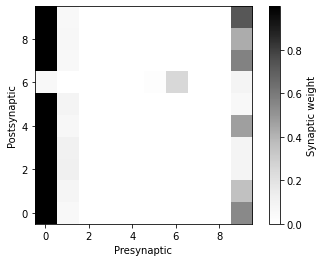

In [84]:
# visualize output

#show_weight_evolution(wXY, 100, st)
show_weights_matrix_at_time(wXY, t3=80000.)